In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import scipy.stats as stats
import missingno as msno
import ptitprince as pt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Reading the data
bank_marketing_data = pd.read_csv('bank-full.csv', sep=';')
bank_marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Cheking its demensions 
bank_marketing_data.shape

(45211, 17)

In [4]:
#Cheking the info
bank_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Deleting all of its duplicates
bank_marketing_data.drop_duplicates()
bank_marketing_data.shape #Cheking again the dimensions to see how much we deleted

(45211, 17)

In [6]:
#Cheking for null/nan values
bank_marketing_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

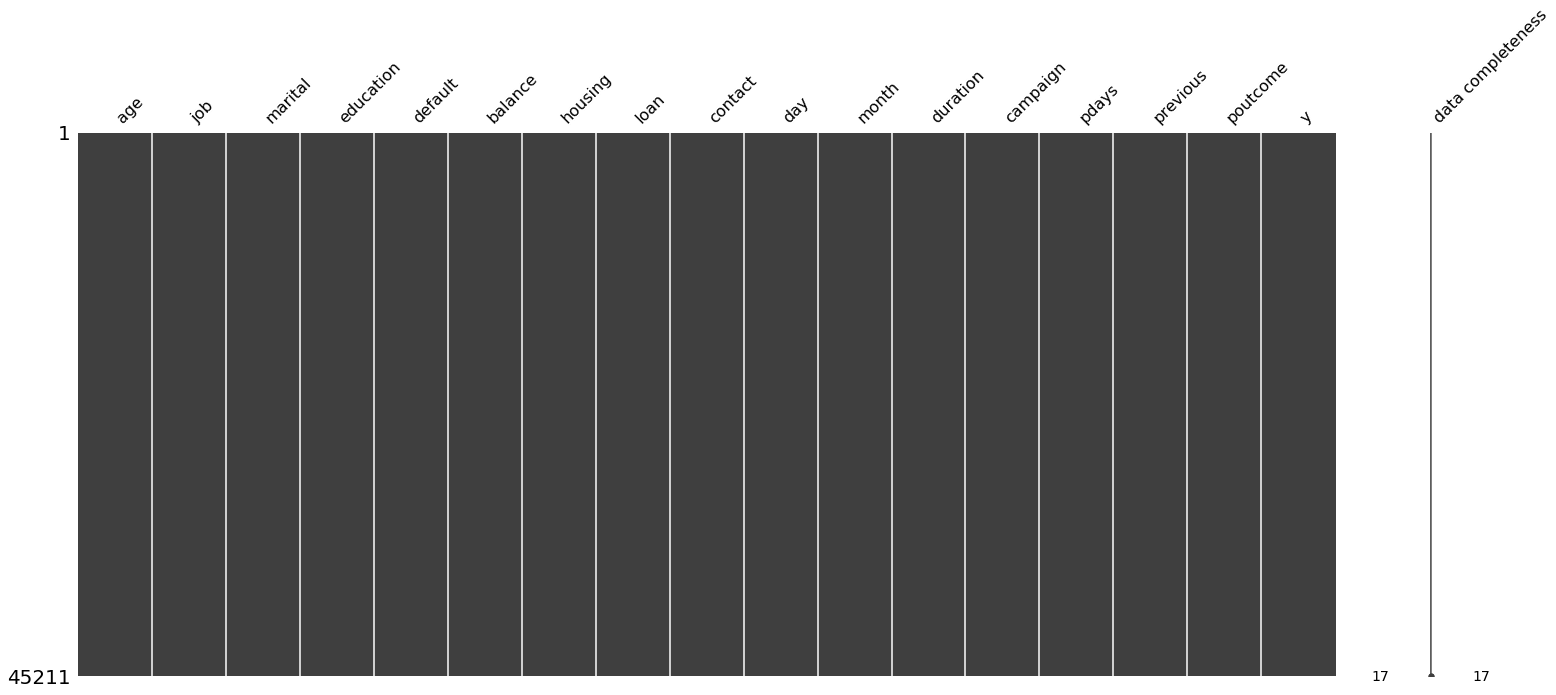

In [7]:
#Graph to check all the missing values
msno.matrix(bank_marketing_data, labels=True)
plt.savefig('missing data.png', dpi=300)
plt.show()

In [8]:
#"999 means client was not previously contacted", check for this specification in the data set description
bank_marketing_data[bank_marketing_data['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
bank_marketing_data[bank_marketing_data['pdays'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [10]:
#Here we see that instead of the 999 that was previously told to us was a -1 which made more sense
new = pd.DataFrame(bank_marketing_data[bank_marketing_data['pdays'] == -1])
new.shape

(36954, 17)

In [11]:
#Here we changed the value '-1' of the pdays columns to '0' so that we can have more correlation with the previous column 
#because both mean the same but they are shown differently 
bank_marketing_data['pdays'].replace(to_replace={-1 : 0}, inplace=True)

In [12]:
#Making sure we don't have more negative values
bank_marketing_data[bank_marketing_data['pdays'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


### Unknown values

What we do here is that like numerical values we sometimes have NaN or Null values, but in categorical we have different words to describe that a data is missing, in this specific context we have the word 'unknown'.
What we are going to do is check how much missing data we have and try to fill the ones that we have and delete the ones that have more thna 50% of missing data.

In [13]:
df = bank_marketing_data[bank_marketing_data['poutcome'].str.contains('unknown')] 
df[['poutcome']].shape

(36959, 1)

In [14]:
#We have around 82% of the data on 'poutcome' with 'unknown' which makes it useless, therefore we delete it
bank_marketing_data.drop("poutcome", axis=1, inplace=True)
bank_marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,no


In [15]:
#Since it's around 29% of the dataframe we're gonna leave it
contact_unknown = bank_marketing_data[bank_marketing_data['contact'].str.contains('unknown')] 
contact_unknown[['contact']].shape

(13020, 1)

In [16]:
#Check for 'unkown' in the other colums
job_unknown = bank_marketing_data[bank_marketing_data['job'].str.contains("unknown")] 
education_unknown = bank_marketing_data[bank_marketing_data['education'].str.contains("unknown")] 
display(job_unknown[['job']].shape)
display(education_unknown[['education']].shape)

(288, 1)

(1857, 1)

In [17]:
#Create a contingency table to see their relationship so that we can fill the unknown data fro education and job columns
contingency_table = pd.crosstab(bank_marketing_data['job'],bank_marketing_data['education'],margins = True, margins_name="Total") #Change the margin name from teh default "All" to "Total"
contingency_table.T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,Total
education,,,,,,,,,,,,,
primary,209,3758,183,627,294,795,130,345,44,158,257,51,6851
secondary,4219,5371,542,395,1121,984,577,3457,508,5229,728,71,23202
tertiary,572,149,686,173,7801,366,833,202,223,1968,289,39,13301
unknown,171,454,76,45,242,119,39,150,163,242,29,127,1857
Total,5171,9732,1487,1240,9458,2264,1579,4154,938,7597,1303,288,45211


In [18]:
#What we do here is that with help of the contigency table we create relationships take the one that repeats the most to 
#fulfill the missing values, e.g. if in the columns education there is an 'unknown' and in the same row but in the column
#job had managment we could see that the one who repeated the most was tertiary, so with that will fill it in.
bank_marketing_data.education = np.where((bank_marketing_data.education == "unknown") & (bank_marketing_data.job == 'blue-collar'), "primary", bank_marketing_data.education)
bank_marketing_data.education = np.where((bank_marketing_data.education == "unknown") & (bank_marketing_data.job == 'technician'), "secondary", bank_marketing_data.education)
bank_marketing_data.education = np.where((bank_marketing_data.education == "unknown") & (bank_marketing_data.job == 'management'), "tertiary", bank_marketing_data.education)

bank_marketing_data.job = np.where((bank_marketing_data.job == "unknown") & (bank_marketing_data.education == 'secondary'), "blue-collar", bank_marketing_data.job)
bank_marketing_data.job = np.where((bank_marketing_data.job == "unknown") & (bank_marketing_data.education == 'primary'), "blue-collar", bank_marketing_data.job)
bank_marketing_data.job = np.where((bank_marketing_data.job == "unknown") & (bank_marketing_data.education == 'tertiary'), "management", bank_marketing_data.job)

bank_marketing_data.job = np.where((bank_marketing_data.age > 60) & (bank_marketing_data.job == 'unknown'), "retired", bank_marketing_data.job)

In [19]:
#Check how our uknown values are now
contingency_table = pd.crosstab(bank_marketing_data['education'],bank_marketing_data['job'],margins = True, margins_name="Total") #Change the margin name from teh default "All" to "Total"
contingency_table.T

education,primary,secondary,tertiary,unknown,Total
job,,,,,
admin.,209,4219,572,171,5171
blue-collar,4263,5442,149,0,9854
entrepreneur,183,542,686,76,1487
housemaid,627,395,173,45,1240
management,294,1121,8082,0,9497
retired,795,984,366,130,2275
self-employed,130,577,833,39,1579
services,345,3457,202,150,4154
student,44,508,223,163,938


## No-Graphical Techniques of Univariate Analysis

### Quantitative data

In [20]:
bank_marketing_data.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,41.02,0.58
std,10.62,3044.77,8.32,257.53,3.10,99.79,2.30
min,18.00,-8019.00,1.00,0.00,1.00,0.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,0.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,0.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,0.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [21]:
#Central Tendency: Mode
bank_marketing_data.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,0,0,no


In [22]:
#Central Tendency: median
bank_marketing_data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays         0.0
previous      0.0
dtype: float64

In [23]:
#Skew
"""
Remember that skewness is:
ASF > 0, Positive Asymmetry.
ASF < 0, Negative Asymetry.
ASF = 0, Asymetric.
"""
bank_marketing_data[['age', 'balance', 'campaign', 'day', 'pdays', 'previous']].apply(stats.skew)

age          0.684795
balance      8.360031
campaign     4.898488
day          0.093076
pdays        2.621663
previous    41.845066
dtype: float64

In [24]:
#Kurtosis
"""
Remember that kurtosis is:
It is actually the measure of outliers present in the distribution
Ap > 3, Leptokurtic means that data are heavy-tailed or profusion of outliers.
Ap < 3, Platikurtic means the distribution produces fewer and less extreme outliers than does the normal distribution.
Ap = 3, Mesokurtic  means means that if the data follows a normal distribution.
"""
bank_marketing_data[['age', 'balance', 'campaign', 'day', 'pdays', 'previous']].apply(stats.kurtosis)

age            0.319402
balance      140.735848
campaign      39.245178
day           -1.059913
pdays          6.980301
previous    4506.362118
dtype: float64

In [25]:
#pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 meand the client
#wasn't previously contact)' In here we choose only the people who has been in contact with the previous marketing campaign
data_old_clients = bank_marketing_data[(bank_marketing_data.pdays != 0)]
data_old_clients.shape

(8257, 16)

In [26]:
#Here the people who hasn't been previously contact with the previous marketing campaign, therefore we can say the are new
data_new_clients = bank_marketing_data[(bank_marketing_data.pdays == 0)]
data_new_clients.shape

(36954, 16)

### Categorical data

In [27]:
def frequency(column):
    frequency = pd.value_counts(column).to_frame()
    frequency['percentage'] = ((frequency*100)/len(bank_marketing_data)).round(2)
    return frequency.T

In [28]:
frequency(bank_marketing_data.job)

,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
job,9854.0,9497.00,7597.0,5171.00,4154.00,2275.00,1579.00,1487.00,1303.00,1240.00,938.00,116.00
percentage,21.8,21.01,16.8,11.44,9.19,5.03,3.49,3.29,2.88,2.74,2.07,0.26


In [29]:
frequency(bank_marketing_data.marital)

,married,single,divorced
marital,27214.00,12790.00,5207.00
percentage,60.19,28.29,11.52


In [30]:
frequency(bank_marketing_data.education)

,secondary,tertiary,primary,unknown
education,23444.00,13543.00,7305.00,919.00
percentage,51.85,29.96,16.16,2.03


In [31]:
frequency(bank_marketing_data.contact)

,cellular,unknown,telephone
contact,29285.00,13020.0,2906.00
percentage,64.77,28.8,6.43


In [32]:
frequency(bank_marketing_data.month)

,may,jul,aug,jun,nov,apr,feb,jan,oct,sep,mar,dec
month,13766.00,6895.00,6247.00,5341.00,3970.00,2932.00,2649.00,1403.0,738.00,579.00,477.00,214.00
percentage,30.45,15.25,13.82,11.81,8.78,6.49,5.86,3.1,1.63,1.28,1.06,0.47


### Binary data

In [33]:
frequency(bank_marketing_data.default)

,no,yes
default,44396.0,815.0
percentage,98.2,1.8


In [34]:
frequency(bank_marketing_data.housing)

,yes,no
housing,25130.00,20081.00
percentage,55.58,44.42


In [35]:
frequency(bank_marketing_data.loan)

,no,yes
loan,37967.00,7244.00
percentage,83.98,16.02


In [36]:
frequency(bank_marketing_data.y)

,no,yes
y,39922.0,5289.0
percentage,88.3,11.7


## Graphical Techniques of  Univariate Analysis

### Numerical data

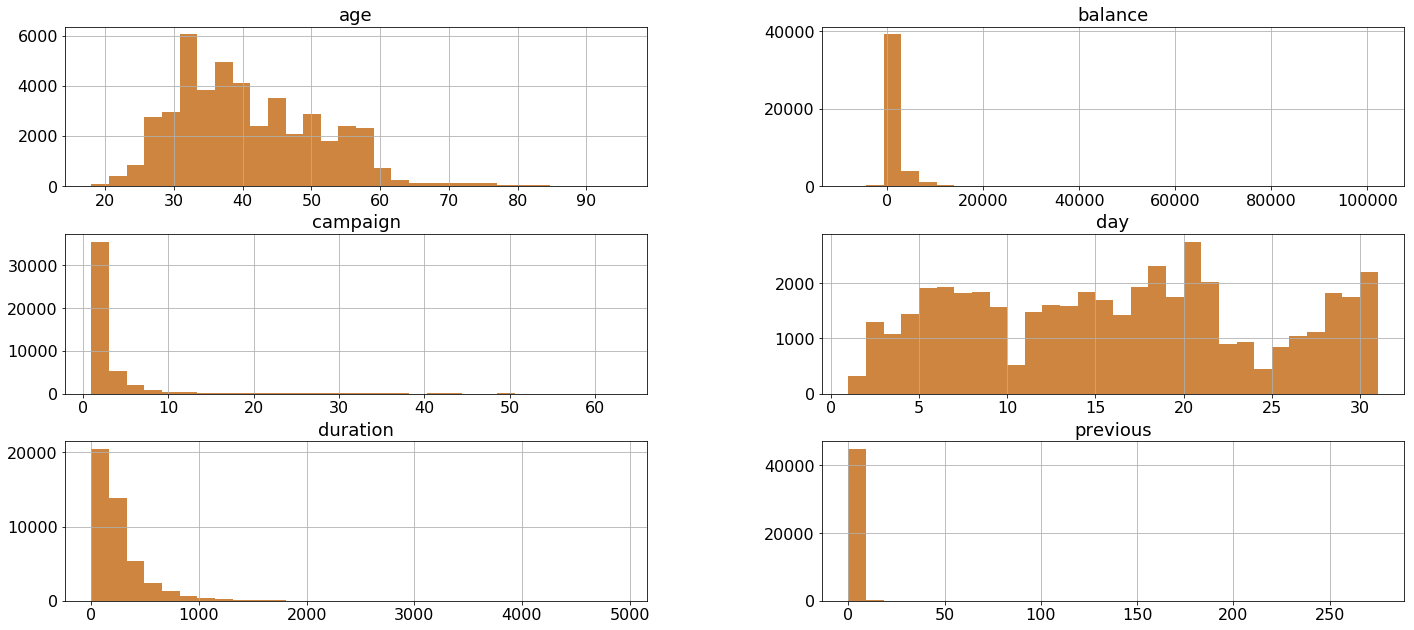

In [37]:
#Select all the numerical variables of the data set
num_data = bank_marketing_data[['age', 'balance', 'campaign', 'duration', 'day', 'previous']]

#Changing the sizes of the title and the x and y labels
params = {'axes.titlesize':'18',
          'xtick.labelsize':'16',
          'ytick.labelsize':'16'}

#Update the sizes for the historgram
plt.rcParams.update(params)

#Create a histogram of the distributions of the numerical data
num_data.hist(bins=30, figsize=(24, 22), layout=(6,2), histtype='bar', color='peru');

#Save the figures
plt.savefig('numerical_distribution.png', dpi = 300)

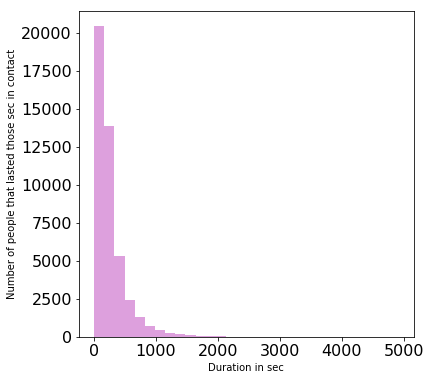

In [38]:
plt.figure(figsize = (6, 6))
plt.hist(bank_marketing_data.duration, bins = 30, histtype='bar', color = 'plum')
plt.xlabel("Duration in sec")
plt.ylabel("Number of people that lasted those sec in contact")
#Save the figures
plt.savefig('Duration count.png', dpi = 300)

C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



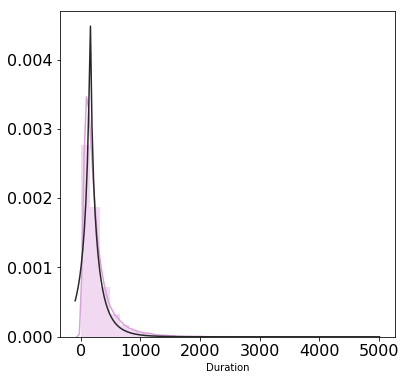

In [39]:
#Fit to geometric distribution
plt.figure(figsize=(6, 6))
sns.distplot(bank_marketing_data.duration, kde=True, fit=stats.gennorm, bins=30, color = 'plum', axlabel = 'Duration');
#Save the figures
plt.savefig('Duration with normal distrubution.png', dpi = 300)

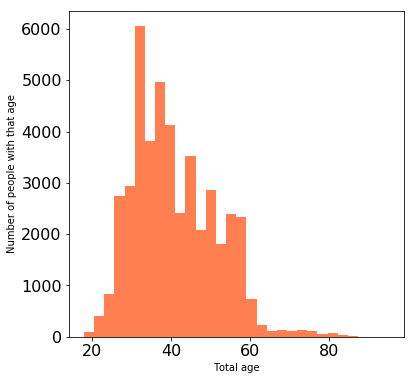

In [40]:
plt.figure(figsize = (6, 6))
plt.hist(bank_marketing_data.age, bins = 30, histtype='bar', color = 'coral')
plt.xlabel("Total age")
plt.ylabel("Number of people with that age")
#Save the figure
plt.savefig('Age count.png', dpi = 300)
plt.show()

In [41]:
#Create a new dataframe but applying the np.log function to the variable 'age'
bank_marketing_data_log = bank_marketing_data.age.apply(np.log)

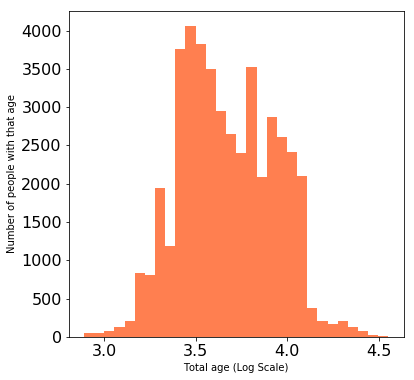

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize = (6, 6))
plt.hist(bank_marketing_data_log, bins = 30,  histtype='bar', color = 'coral')
plt.xlabel("Total age (Log Scale)")
plt.ylabel("Number of people with that age")
plt.show()
#Save the figure
plt.savefig('Age count log.png', dpi = 300)
plt.show()

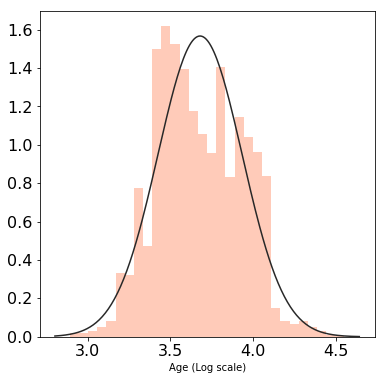

In [43]:
#Fit to normal distribution
plt.figure(figsize = (6, 6))
sns.distplot(bank_marketing_data_log, kde=False, fit=stats.norm, bins=30, color = 'coral', axlabel = 'Age (Log scale)');
#Save the figure
plt.savefig('Age count log-norm.png', dpi = 300)
plt.show()

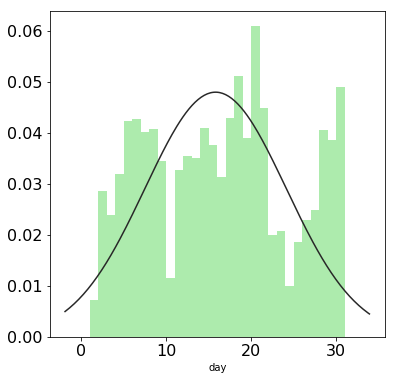

In [44]:
plt.figure(figsize = (6, 6))
sns.distplot(bank_marketing_data.day, kde=False, fit=stats.norm, bins=30, color = 'limegreen')
#Save the figure
plt.savefig('Day count.png', dpi = 300)
plt.show()

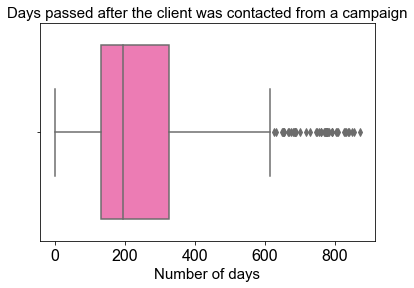

In [45]:
ax = sns.boxplot(x=data_old_clients.pdays, color='hotpink')
sns.set(style="whitegrid")
plt.title('Days passed after the client was contacted from a campaign',fontsize=15)
plt.xlabel('Number of days',fontsize=15)

#Save the graph
plt.savefig('Passed days of contact boxplot.png', dpi=300)
plt.show()

### Catgorical data

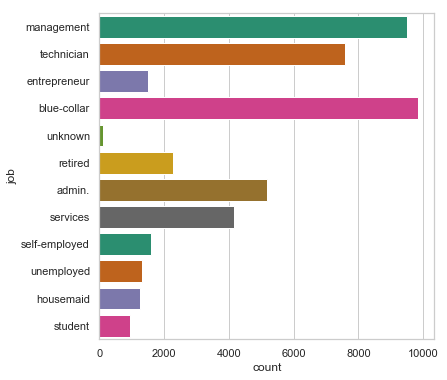

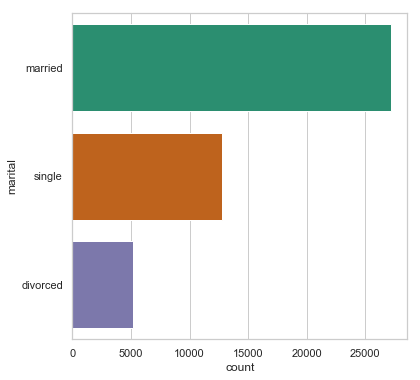

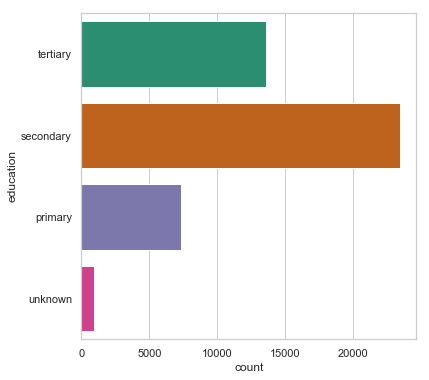

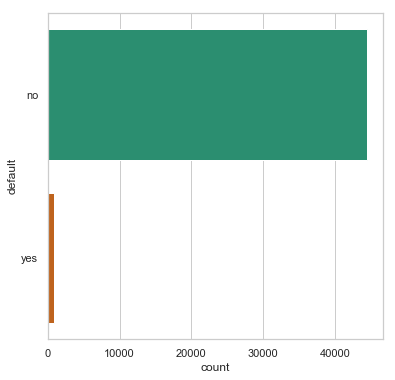

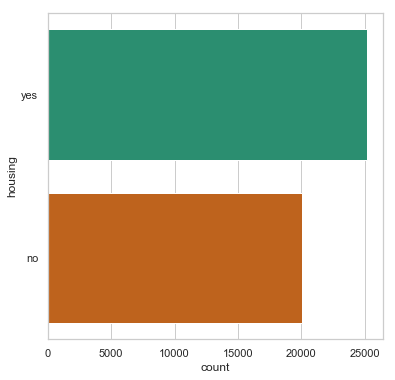

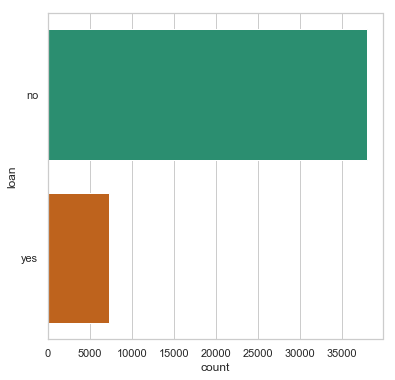

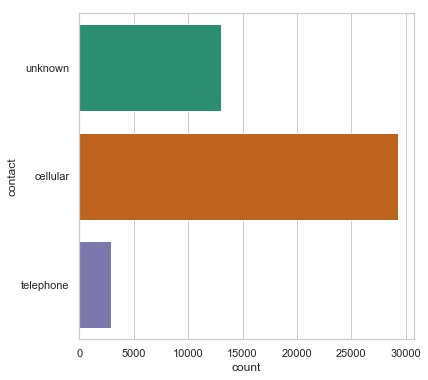

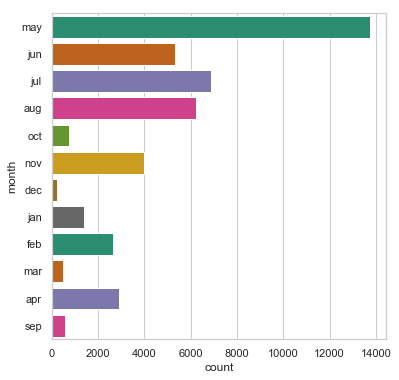

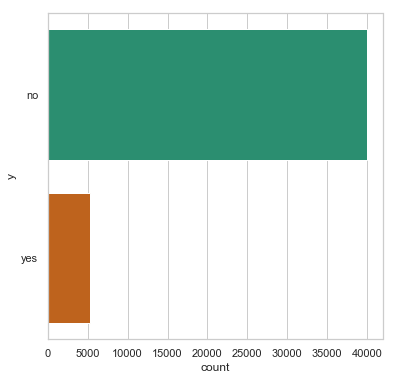

In [46]:
#Categorical variables count
cat_data = bank_marketing_data[['job', 'marital', 'education','default', 'housing', 'loan','contact', 'month', 'y']]
for column in cat_data.columns[:9]:
    plt.figure(figsize = (6, 6))
    ax = sns.countplot(y=column, data=cat_data, palette="Dark2")
    #Save the figures
    fig = '{0} count.png'.format(column)
    plt.savefig(fig, dpi=300)
    plt.show()

## Mutivariable analysis

In [47]:
#“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables
correlation = bank_marketing_data.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855
pdays,-0.023841,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000


In [107]:
data_old_clients.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.115480,0.018399,0.060519,0.003842,-0.107863,0.002280
balance,0.115480,1.000000,0.051732,0.040998,-0.008150,-0.108122,0.001570
day,0.018399,0.051732,1.000000,-0.012687,-0.029295,-0.090095,-0.016801
duration,0.060519,0.040998,-0.012687,1.000000,-0.088394,-0.024407,-0.002150
campaign,0.003842,-0.008150,-0.029295,-0.088394,1.000000,0.050534,0.135523
pdays,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885
previous,0.002280,0.001570,-0.016801,-0.002150,0.135523,-0.021885,1.000000


In [108]:
data_new_clients.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.093517,-0.015470,-0.018972,0.005176,NaN,NaN
balance,0.093517,1.000000,-0.002351,0.017544,-0.012058,NaN,NaN
day,-0.015470,-0.002351,1.000000,-0.033299,0.176441,NaN,NaN
duration,-0.018972,0.017544,-0.033299,1.000000,-0.085894,NaN,NaN
campaign,0.005176,-0.012058,0.176441,-0.085894,1.000000,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


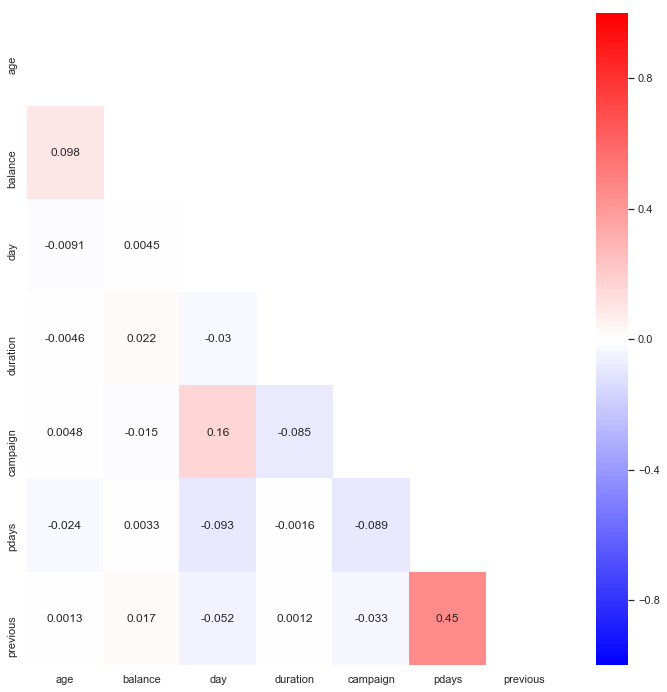

In [48]:
#Here I tried to put the max in 1 and min -1 for the column, but it didn't show up:(
mask = np.zeros_like (correlation, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.rcParams['figure.figsize'] =  [12,12]
sns.heatmap(correlation, annot = True, cmap = 'bwr', mask = mask, center=0, vmin=-1, vmax=1)
plt.savefig('Correlation.png', dpi = 300)
plt.show()

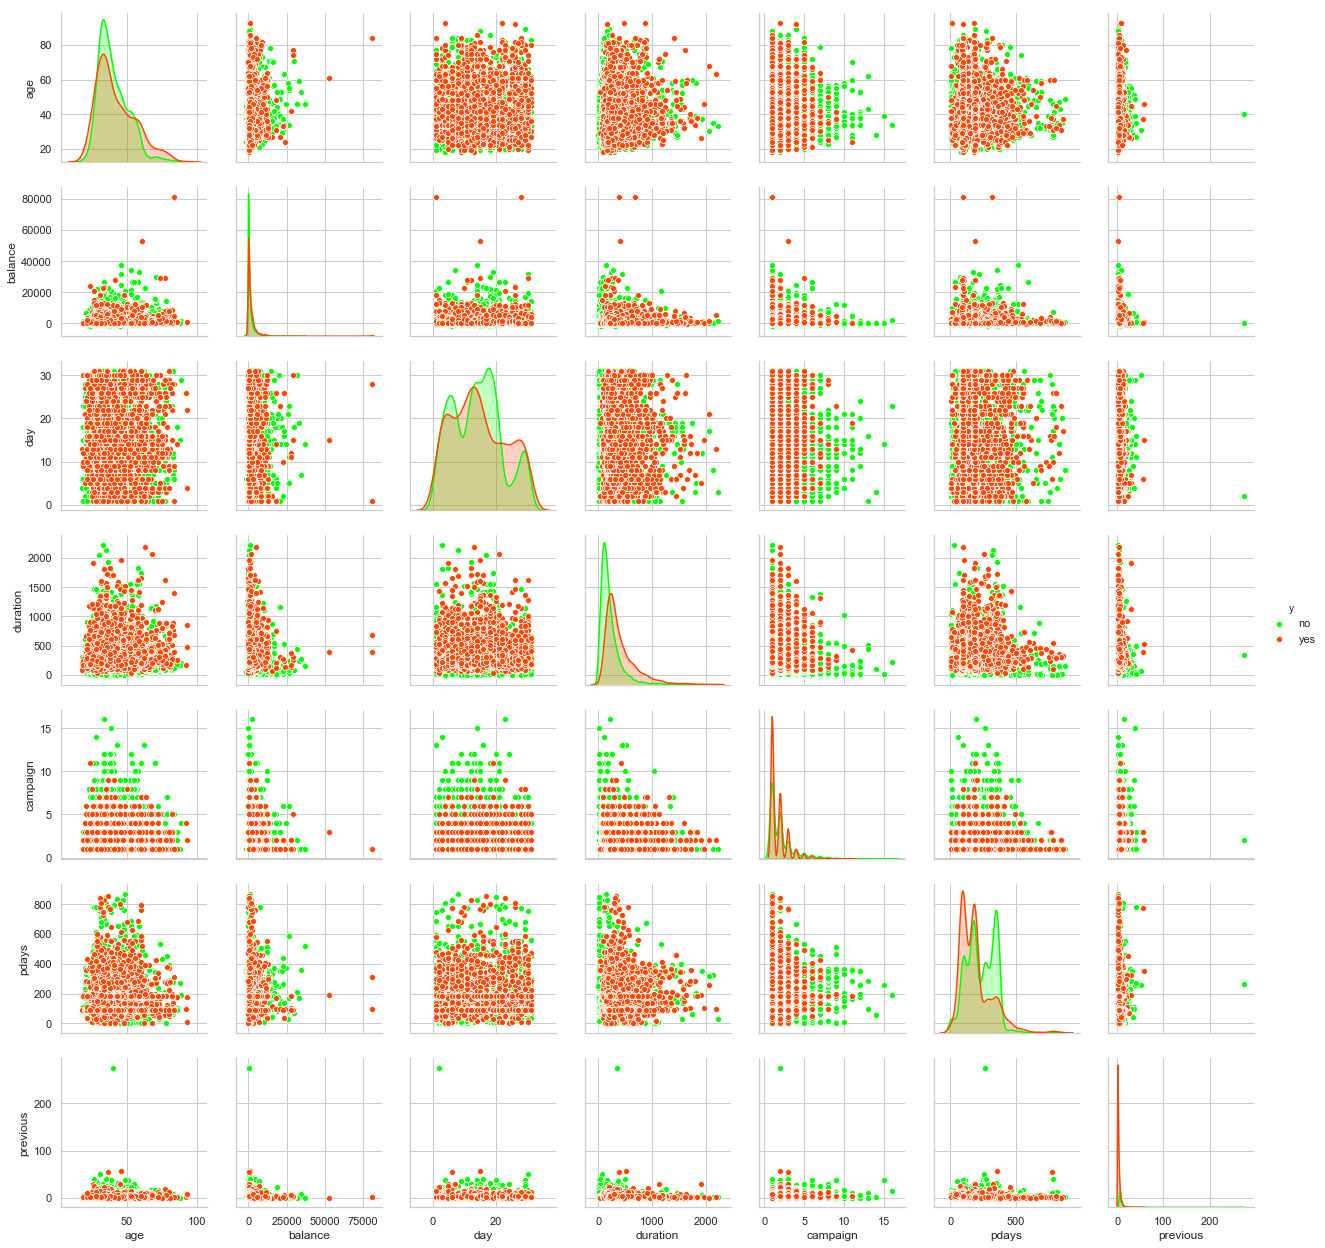

In [49]:
#Correlation based on the target shown in distribution
sns.pairplot(data_old_clients, hue = "y", palette={"yes": "orangered", "no": "lime"})
plt.savefig('Correlation old clients.png')
plt.show()

C:\Users\alexa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\alexa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



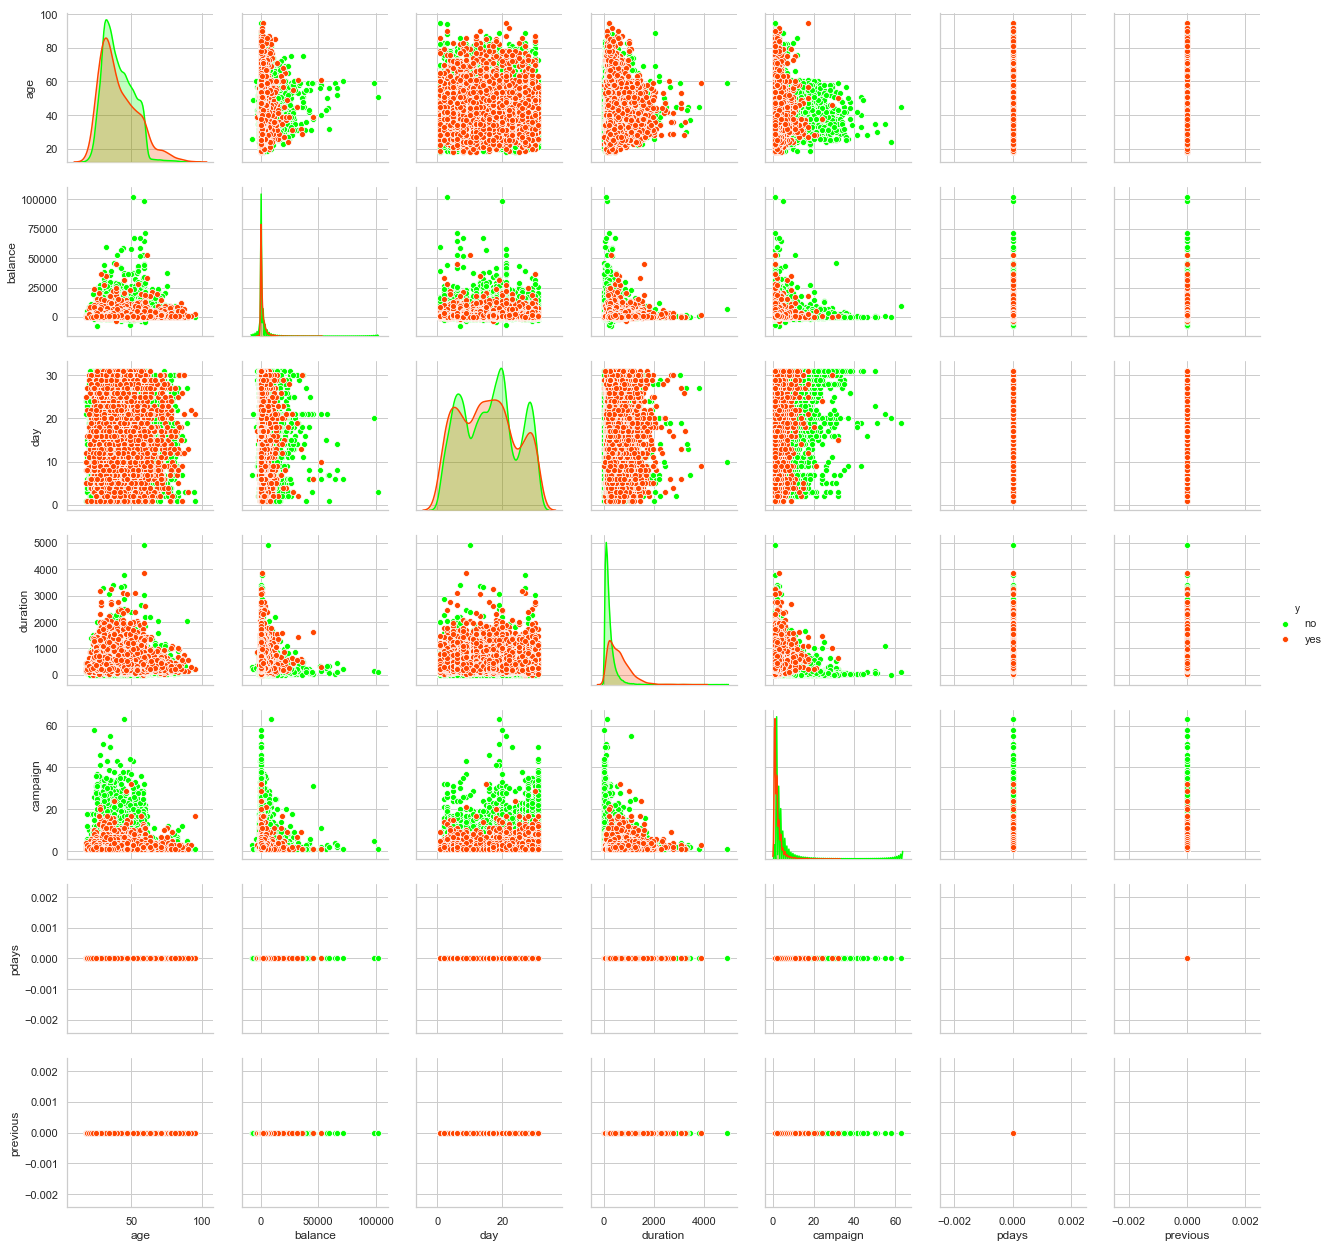

In [50]:
#Correlation based on the target shown in distribution
sns.pairplot(data_new_clients, hue = "y", palette={"yes": "orangered", "no": "lime"})
plt.savefig('Correlation new clients.png')
plt.show()

In [51]:
#“Covariance” indicates the direction of the linear relationship between variables
covariance = bank_marketing_data.cov()
covariance

,age,balance,day,duration,campaign,pdays,previous
age,112.758107,3.161477e+03,-0.805979,-12.711716,0.156601,-25.263640,0.031512
balance,3161.476700,9.270599e+06,114.095467,16905.750545,-137.513232,1011.779166,116.939527
day,-0.805979,1.140955e+02,69.263609,-64.740317,4.189519,-77.258306,-0.991307
duration,-12.711716,1.690575e+04,-64.740317,66320.574090,-67.471794,-40.706238,0.713654
campaign,0.156601,-1.375132e+02,4.189519,-67.471794,9.597733,-27.363144,-0.234459
pdays,-25.263640,1.011779e+03,-77.258306,-40.706238,-27.363144,9958.566038,104.425554
previous,0.031512,1.169395e+02,-0.991307,0.713654,-0.234459,104.425554,5.305841


#### Each numerical varible with the target

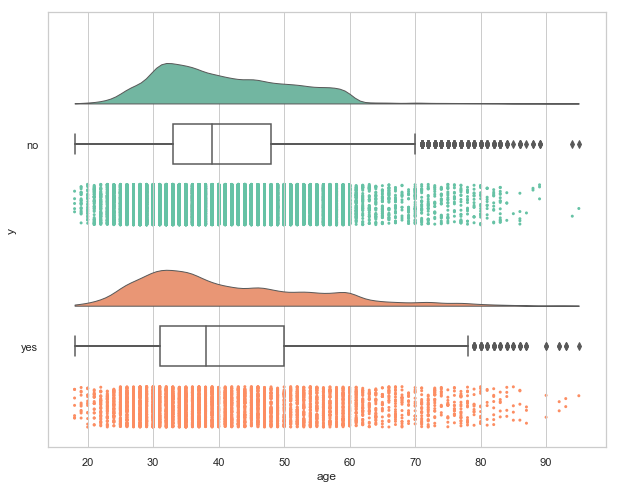

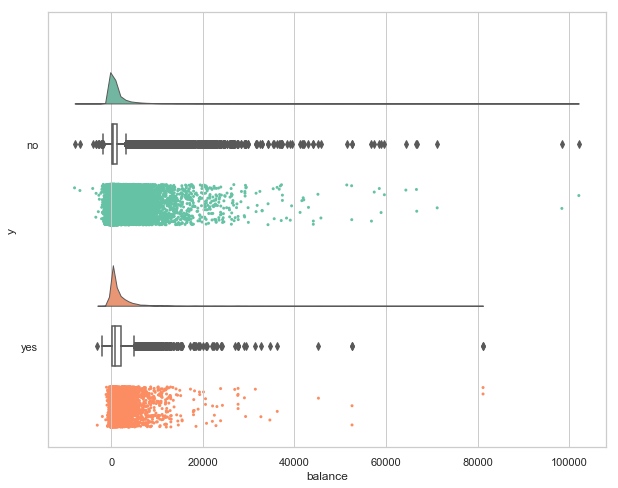

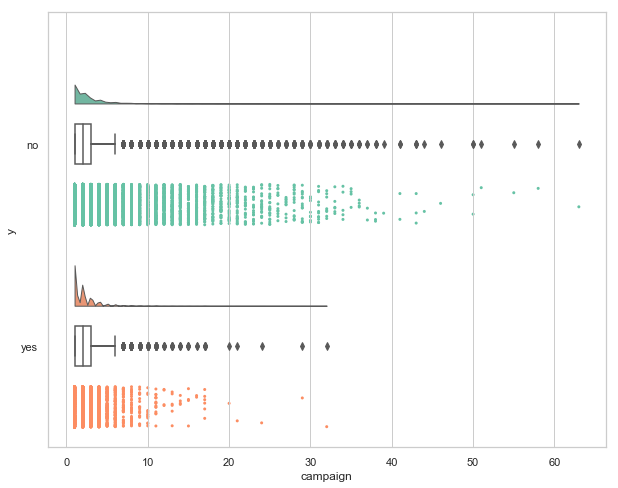

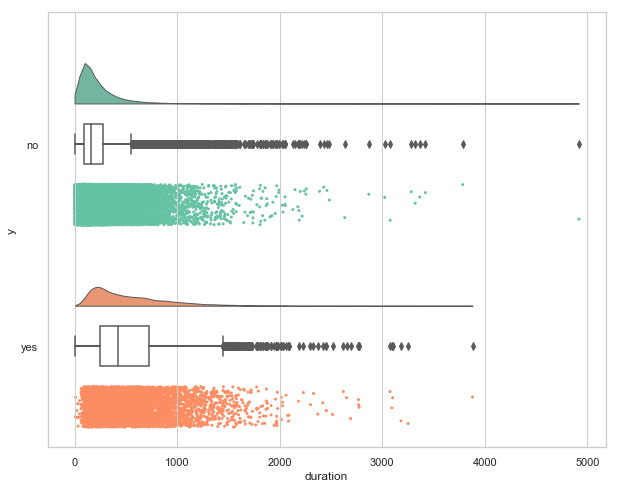

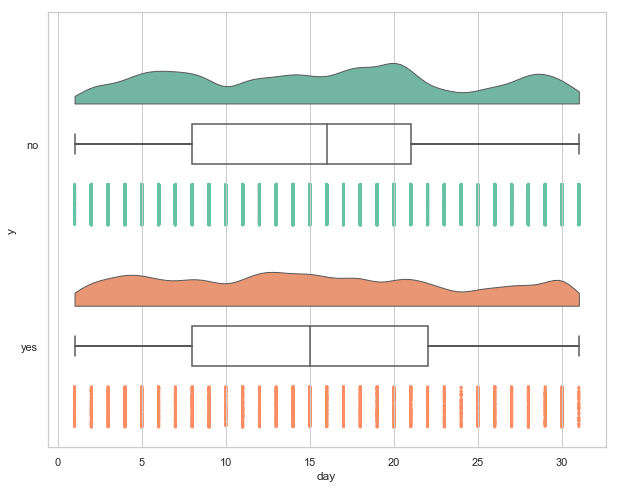

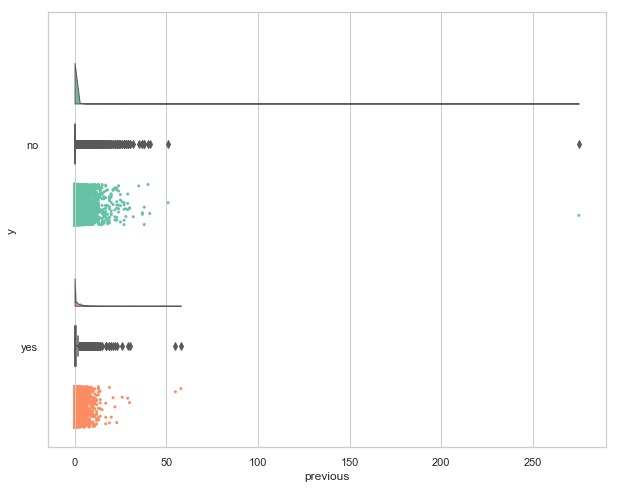

In [109]:
#Numerical data based on target
num_data = bank_marketing_data[['age', 'balance', 'campaign', 'duration', 'day', 'previous', 'y']]
for column in num_data.columns[:6]:
    plt.figure(figsize=(10, 8))
    ax=pt.RainCloud(x = 'y', y = column, 
                data = bank_marketing_data, 
                palette = 'Set2', 
                bw = .1,
                width_viol = .4,
                width_box = .2,                     
                orient = 'h',
                move = .3)
    #Save the figures
    fig2 = '{0} and target.png'.format(column)
    plt.savefig(fig2)
    plt.show()

#### Each categorical varible with the target

y,no,yes
job,,
admin.,4540,631
blue-collar,9134,720
entrepreneur,1364,123
housemaid,1131,109
management,8192,1305
retired,1756,519
self-employed,1392,187
services,3785,369
student,669,269


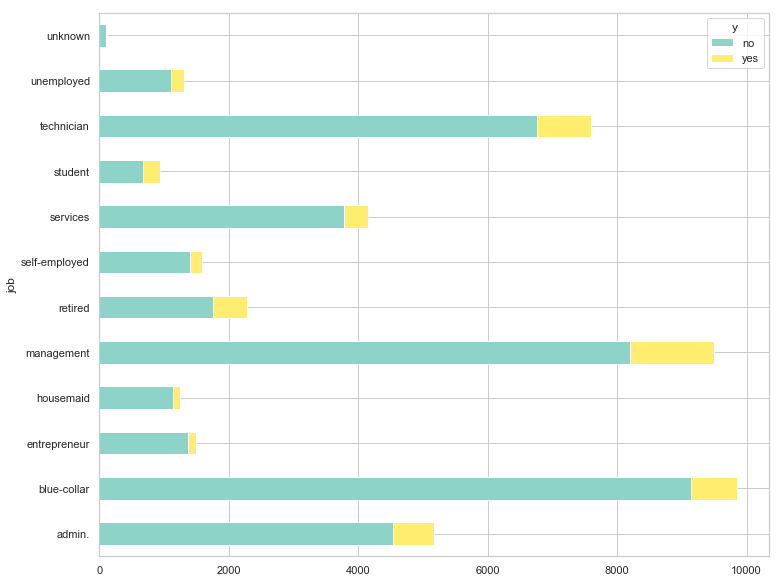

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


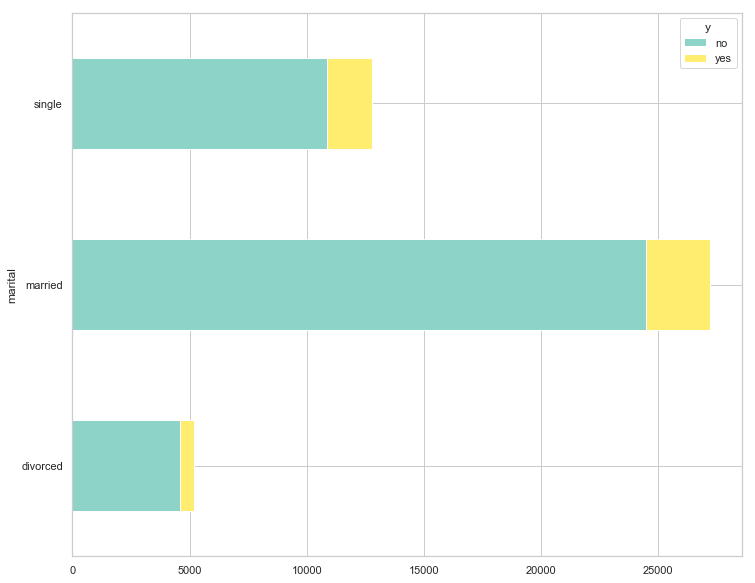

y,no,yes
education,,
primary,6681,624
secondary,20971,2473
tertiary,11499,2044
unknown,771,148


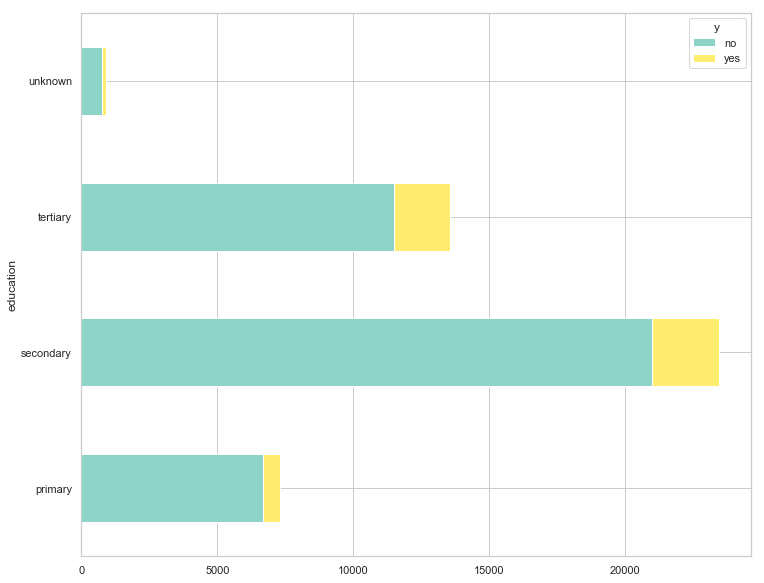

y,no,yes
default,,
no,39159,5237
yes,763,52


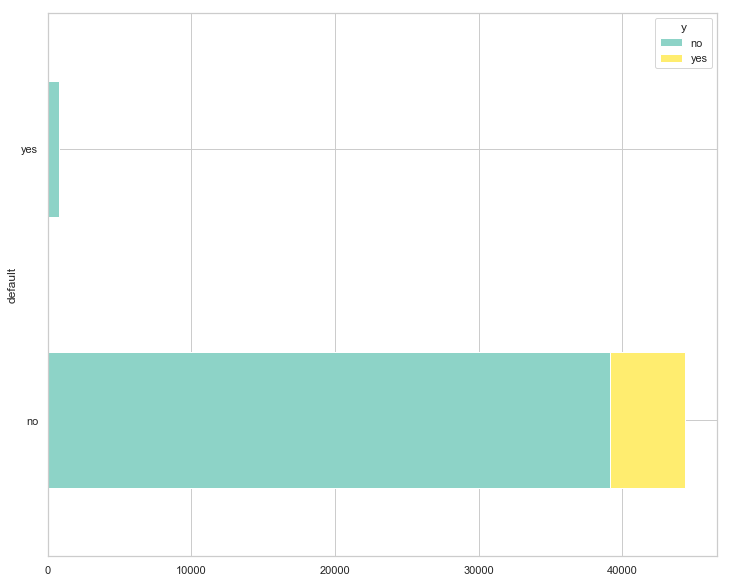

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


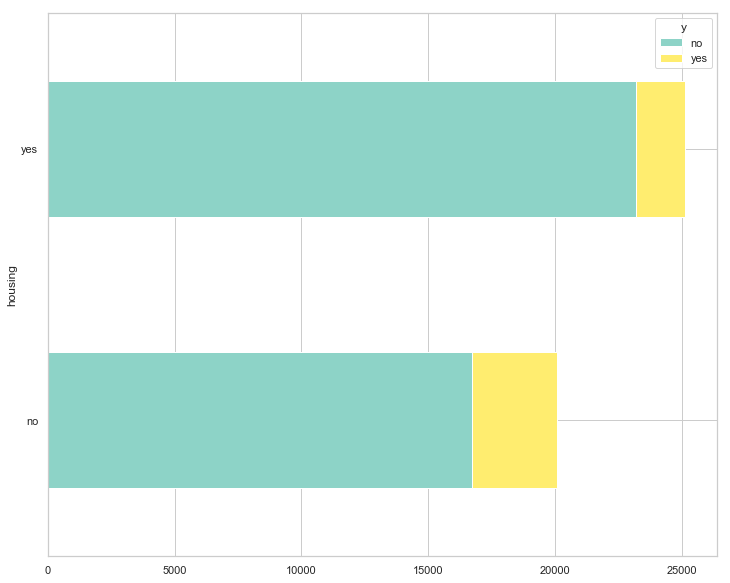

y,no,yes
loan,,
no,33162,4805
yes,6760,484


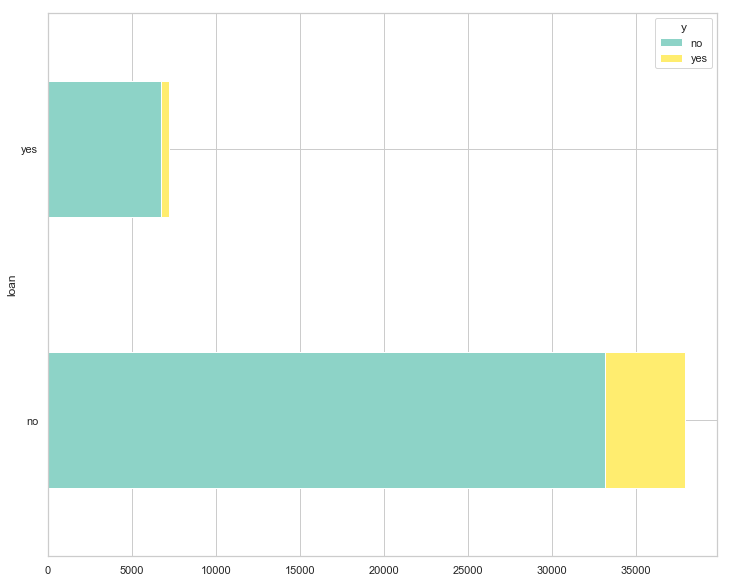

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


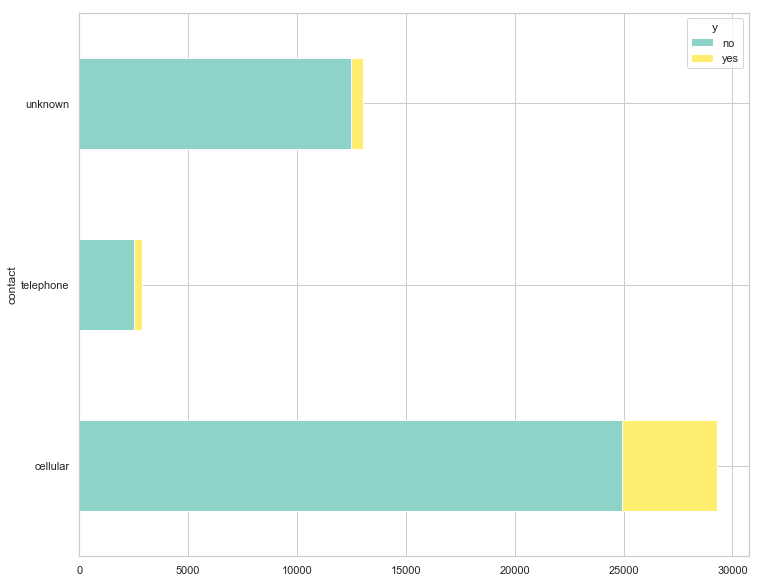

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


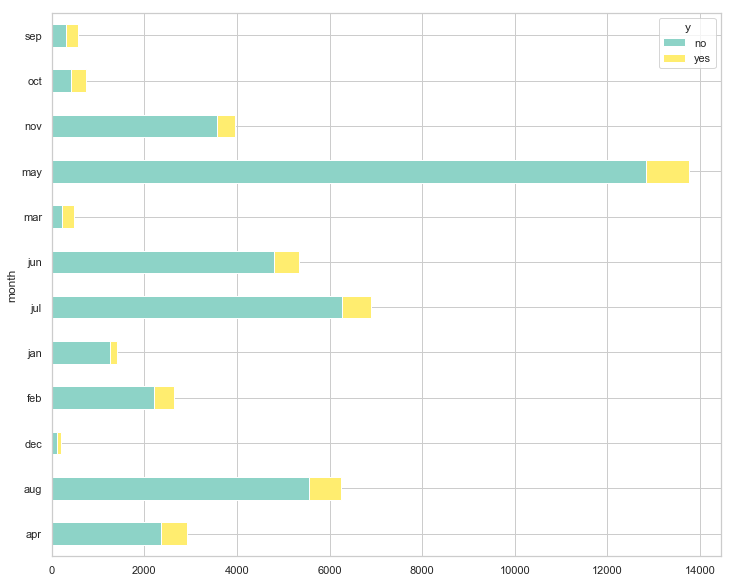

In [114]:
#Categorical varaibles cound based on target
cat_data = bank_marketing_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']]
for column in cat_data.columns[:8]:
    #No-graphical
    tabulation = pd.crosstab(index = bank_marketing_data[column], columns = bank_marketing_data.y)
    display(tabulation)
    #Graphical
    tabulation.plot(kind='barh', stacked=True, colormap='Set3', figsize=(12,10))
    #Save the graph
    fig2 = '{0} and target.png'.format(column)
    plt.savefig(fig2)
    plt.show()

#### Age with categorical variables

,age
job,
admin.,39.28
blue-collar,40.16
entrepreneur,42.18
housemaid,46.17
management,40.49
retired,60.45
self-employed,40.64
services,38.79
student,26.51


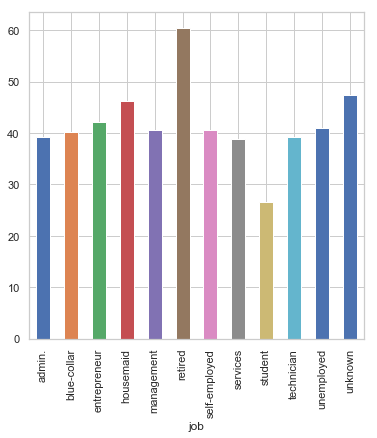

In [115]:
plt.figure(figsize = (6, 6))
#No-Graphical
job_age = df.groupby('job')['age'].mean().round(2)
display(job_age.to_frame())
#Graphical
job_age.plot(kind='bar');
plt.savefig('Age and Job.png', dpi=300)
plt.show()

,age
marital,
divorced,45.69
married,43.28
single,33.77


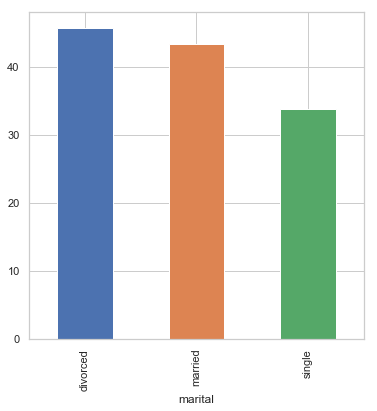

In [116]:
plt.figure(figsize = (6, 6))
#No-Graphical
marital_age = df.groupby('marital')['age'].mean().round(2)
display(marital_age.to_frame())
#Graphical
marital_age.plot(kind='bar');
plt.savefig('Age and marital.png', dpi=300)
plt.show()

,age
education,
primary,45.63
secondary,39.92
tertiary,39.66
unknown,44.46


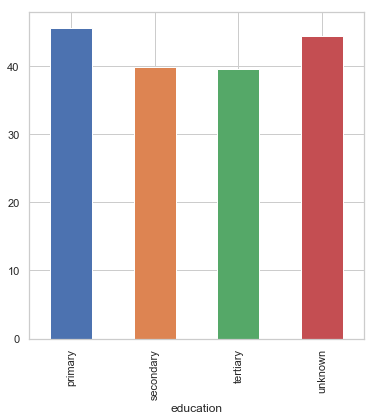

In [117]:
plt.figure(figsize = (6, 6))
#No-Graphical
education_age = df.groupby('education')['age'].mean().round(2)
display(education_age.to_frame())
#Graphical
education_age.plot(kind='bar');
plt.savefig('Age and education.png', dpi=300)
plt.show()

#### Age with numerical data

<Figure size 432x432 with 0 Axes>

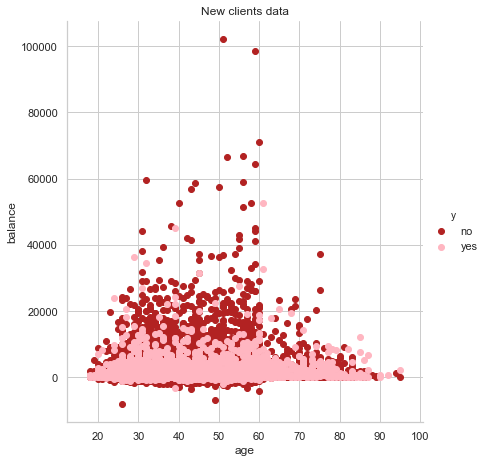

In [118]:
#The data is from the new clients and we are comparing their age and their balance, remember that <= 0 means that has no debt
#otherwise it has a debt
g = sns.FacetGrid(data_new_clients, hue = "y", palette={"yes": "lightpink", "no": "firebrick"})
g = g.map(plt.scatter, "age", "balance")
g.fig.set_figwidth(8)
g.fig.set_figheight(8)
g = g.add_legend()
plt.title('New clients data')
plt.savefig('Age and Balance new clients.png', dpi=300)
plt.show()

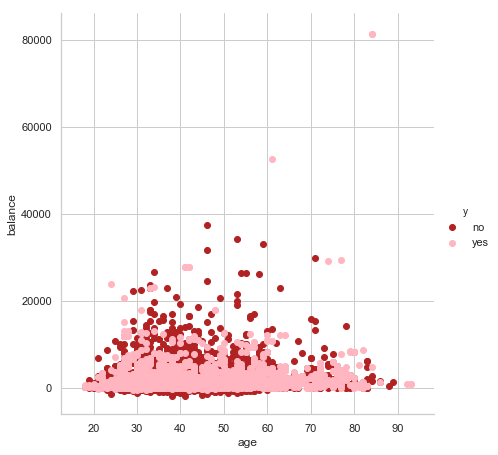

In [66]:
#The data is from the old clients and we are comparing their age and their balance, remember that <= 0 means that has no debt
#otherwise it has a debt
g = sns.FacetGrid(data_old_clients, hue = "y", palette={"yes": "lightpink", "no": "firebrick"})
g = g.map(plt.scatter, "age", "balance")
g.fig.set_figwidth(8)
g.fig.set_figheight(8)
g = g.add_legend()
plt.savefig('Age and Balance old clients.png', dpi=300)
plt.show()

In [67]:
#No-graphical
display(data_new_clients[['age', 'balance']].corr())
display(data_old_clients[['age', 'balance']].corr())

,age,balance
age,1.000000,0.093517
balance,0.093517,1.000000


,age,balance
age,1.00000,0.11548
balance,0.11548,1.00000


#### Job with categorical data

In [70]:
#No-graphical
job_target = pd.crosstab(index = bank_marketing_data.job, columns = bank_marketing_data.education)
job_target

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,4263,5442,149,0
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,8082,0
retired,795,984,366,130
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


<Figure size 1080x576 with 0 Axes>

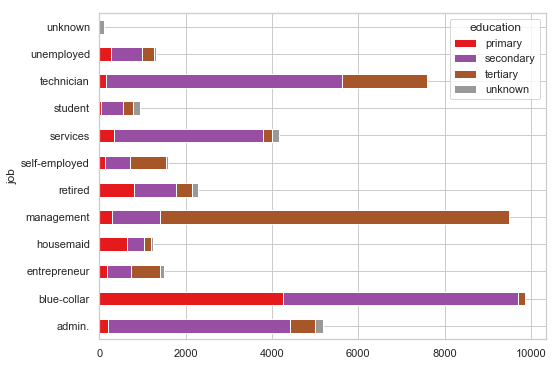

In [71]:
#Graphical
plt.figure(figsize=(15,8))
job_target.plot(kind='barh', stacked=True, colormap='Set1', figsize=(8,6))
plt.savefig('Job and education.png', dpi=300)
plt.show()

In [72]:
#No-graphical
marital_job = pd.crosstab(index = bank_marketing_data.job, columns = bank_marketing_data.marital)
marital_job

marital,divorced,married,single
job,,,
admin.,750,2693,1728
blue-collar,757,7051,2046
entrepreneur,179,1070,238
housemaid,184,912,144
management,1114,5425,2958
retired,427,1740,108
self-employed,140,993,446
services,549,2407,1198
student,6,54,878


<Figure size 1080x576 with 0 Axes>

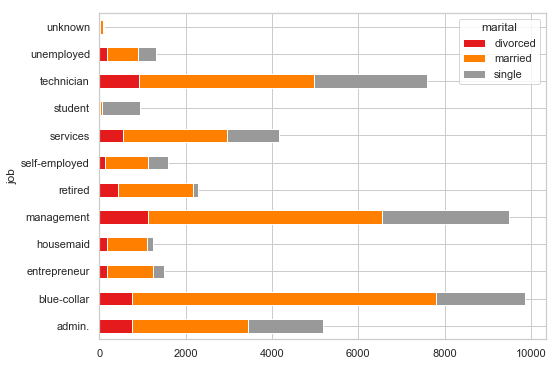

In [73]:
#Graphical
plt.figure(figsize=(15,8))
marital_job.plot(kind='barh', stacked=True, colormap='Set1', figsize=(8,6))
plt.savefig('Job and marital.png', dpi=300)
plt.show()

In [74]:
#No-graphical
housing_job = pd.crosstab(index = bank_marketing_data.job, columns = bank_marketing_data.housing)
housing_job

housing,no,yes
job,,
admin.,1989,3182
blue-collar,2791,7063
entrepreneur,618,869
housemaid,842,398
management,4816,4681
retired,1783,492
self-employed,814,765
services,1388,2766
student,689,249


<Figure size 1080x576 with 0 Axes>

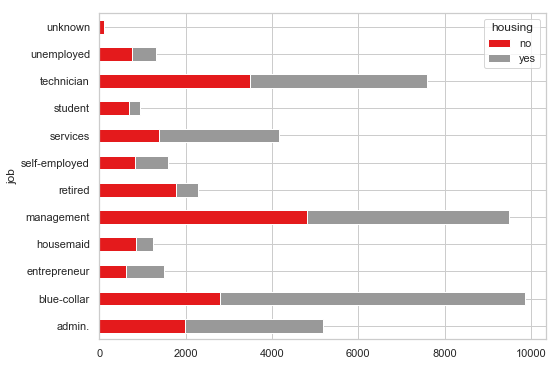

In [75]:
#Graphical
plt.figure(figsize=(15,8))
housing_job.plot(kind='barh', stacked=True, colormap='Set1', figsize=(8,6))
plt.savefig('Job and housing.png', dpi=300)
plt.show()

In [76]:
#No-graphical
loan_job = pd.crosstab(index = bank_marketing_data.job, columns = bank_marketing_data.loan)
loan_job

loan,no,yes
job,,
admin.,4180,991
blue-collar,8166,1688
entrepreneur,1131,356
housemaid,1088,152
management,8244,1253
retired,1966,309
self-employed,1350,229
services,3318,836
student,926,12


<Figure size 1080x576 with 0 Axes>

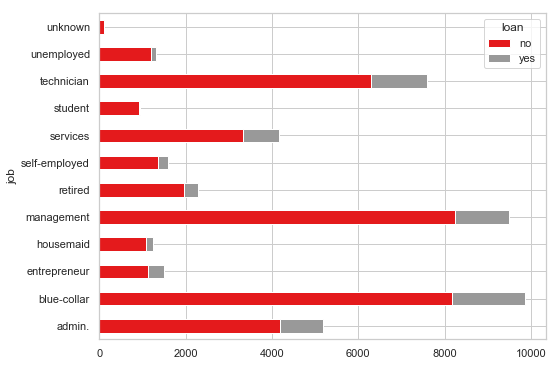

In [77]:
#Graphical
plt.figure(figsize=(15,8))
loan_job.plot(kind='barh', stacked=True, colormap='Set1', figsize=(8,6))
plt.savefig('Job and loan.png', dpi=300)
plt.show()

#### Job with numerial data

In [80]:
job_balance = df.groupby('job')['balance'].mean().round(2)
job_balance.to_frame()

,balance
job,
admin.,1127.34
blue-collar,1066.64
entrepreneur,1572.69
housemaid,1347.94
management,1707.65
retired,1786.53
self-employed,1563.62
services,959.23
student,1322.42


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 1080x576 with 0 Axes>

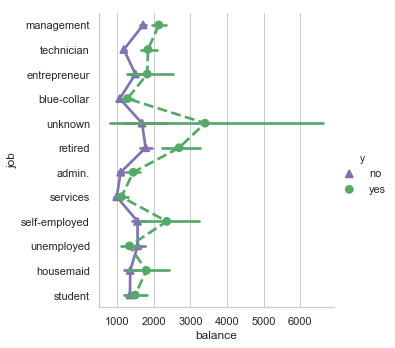

In [135]:
#Job and balance
plt.figure(figsize=(15,8))
sns.catplot(x="balance", y="job", hue="y",
            palette={"yes": "g", "no": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=bank_marketing_data);
plt.savefig('job and balance.png', dpi=300)
plt.show()

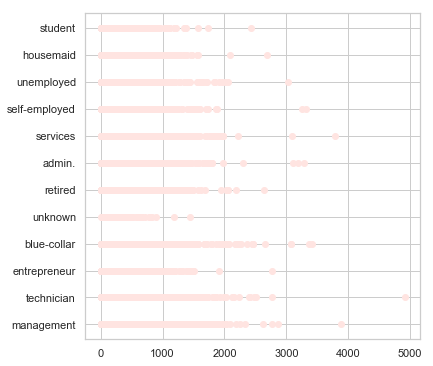

In [136]:
#job and duration
plt.figure(figsize=(6,6))
plt.scatter(bank_marketing_data['duration'], bank_marketing_data['job'], color='mistyrose');
plt.savefig('job and duration.png', dpi=300)
plt.show()

In [105]:
#Check the result of every month
def success_month(month):
    success = bank_marketing_data[(bank_marketing_data['month'] == month) & (bank_marketing_data['y'] == 'yes')]
    return success

In [106]:
print('May succes: {0}'.format(success_month('may').shape))
print('June succes: {0}'.format(success_month('jun').shape))
print('July succes: {0}'.format(success_month('jul').shape))
print('August succes: {0}'.format(success_month('aug').shape))
print('October succes: {0}'.format(success_month('oct').shape))
print('November succes: {0}'.format(success_month('nov').shape))
print('December succes: {0}'.format(success_month('dec').shape))
print('January succes: {0}'.format(success_month('jan').shape))
print('February succes: {0}'.format(success_month('feb').shape))
print('April succes: {0}'.format(success_month('apr').shape))
print('September succes: {0}'.format(success_month('sep').shape))

May succes: (925, 16)
June succes: (546, 16)
July succes: (627, 16)
August succes: (688, 16)
October succes: (323, 16)
November succes: (403, 16)
December succes: (100, 16)
January succes: (142, 16)
February succes: (441, 16)
April succes: (577, 16)
September succes: (269, 16)


In [137]:
#Month and campaign
month_campaign= df.groupby('month')['campaign'].mean().round(2)
month_campaign.to_frame()

,campaign
month,
apr,1.98
aug,4.12
dec,2.00
feb,2.44
jan,1.64
jul,3.58
jun,3.22
mar,2.36
may,2.48


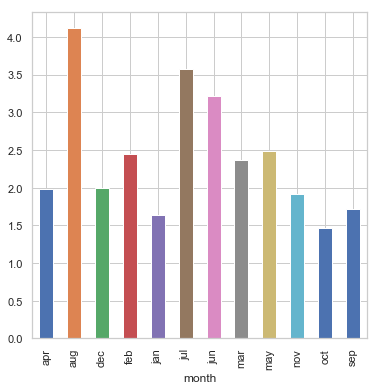

In [138]:
#Graphical
plt.figure(figsize = (6, 6))
month_campaign.plot(kind='bar');
plt.savefig('Month and campaign.png', dpi=300)
plt.show()

In [139]:
#Duration based on the contact 
duration_contact= df.groupby('contact')['duration'].mean().round(2)
duration_contact.to_frame()

,duration
contact,
cellular,263.50
telephone,228.94
unknown,253.13


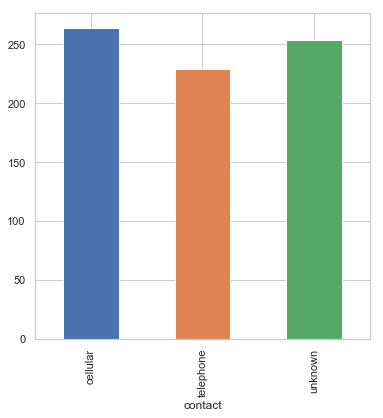

In [140]:
#Graphical
plt.figure(figsize = (6, 6))
duration_contact.plot(kind='bar');
plt.savefig('Contact and duration.png', dpi=300)
plt.show()

In [141]:
#No debt
balance_good = bank_marketing_data[(bank_marketing_data.balance < 0)]
balance_good.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,0,0,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,0,0,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,0,0,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,0,0,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,0,0,no


In [150]:
balance_good.balance.min()

-8019

In [142]:
#With debt
balance_bad = bank_marketing_data[(bank_marketing_data.balance > 0)]
balance_bad.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,no
3,47,blue-collar,married,primary,no,1506,yes,no,unknown,5,may,92,1,0,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,no


In [151]:
balance_bad.balance.max()

102127

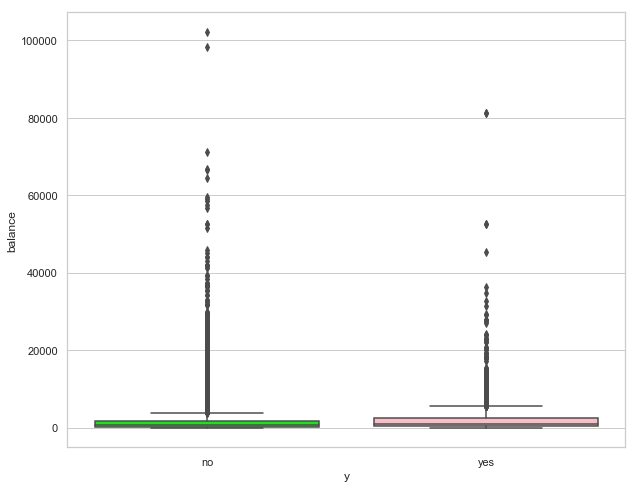

In [143]:
#Graphical debt
plt.figure(figsize=(10, 8))
sns.boxplot(x='y', y='balance', data=balance_bad, palette={"yes": "lightpink", "no": "lime"});
plt.savefig('Bad balance', dpi=300)
plt.show()

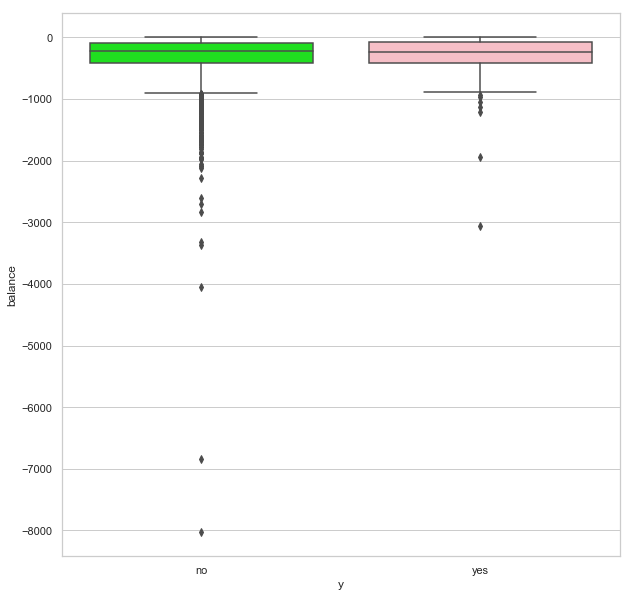

In [144]:
#Graphical no-debt
plt.figure(figsize=(10, 10))
sns.boxplot(x='y', y='balance', data=balance_good, palette={"yes": "lightpink", "no": "lime"});
plt.savefig('Good balance.png', dpi=300)
plt.show()

In [90]:
#Create a contingency table
contingency_table = pd.crosstab(bank_marketing_data['campaign'],bank_marketing_data['y'],margins = True, margins_name="Total") #Change the margin name from teh default "All" to "Total"
contingency_table #Shows the table

y,no,yes,Total
campaign,,,
1,14983,2561,17544
2,11104,1401,12505
3,4903,618,5521
4,3205,317,3522
5,1625,139,1764
6,1199,92,1291
7,688,47,735
8,508,32,540
9,306,21,327


In [91]:
succes_percentage = len([x for x in bank_marketing_data["y"] if x=='yes']) * 100 / len(bank_marketing_data)
print("The succes percentage was: {:.2f}%".format(succes_percentage))

The succes percentage was: 11.70%


In [92]:
succes_percentage = len([x for x in data_new_clients["y"] if x=='yes']) * 100 / len(data_new_clients)
print("The succes percentage with new clients was: {:.2f}%".format(succes_percentage))

The succes percentage with new clients was: 9.16%


In [93]:
succes_percentage = len([x for x in data_old_clients["y"] if x=='yes']) * 100 / len(data_old_clients)
print("The succes percentage with old clients was: {:.2f}%".format(succes_percentage))

The succes percentage with old clients was: 23.07%
